### [Imports](#imports)  
### [Chargement du dataframe](#loading)    
### [Fonction de pré-traitement du jeu de données](#pre-traitement)  
### [Wordcloud après traitements](#wordcloudtreated)  
### [Lémmatisation](#lemmatisation)  
### [Stemming](#stemming)
### [Rappel nombres de variables cible dans le dataframe](#rappel_target)  
### [Régression Logistique modèle de base (Countvectorizer avec Lémmatisation)](#log_count_lem)  
### [Régression Logistique modèle de base (Countvectorizer avec Stemming)](#log_count_stem)   
### [Régression Logistique modèle de base (TF-IDF avec Lémmatisation)](#log_tfidf_lem)  
### [Régression Logistique modèle de base (TF-IDF avec Stemming)](#log_tfidf_stem)  
### [Graphique AUC-ROC meilleur modèle](#best_model)
### [SHAP du meilleur modèle](#shap_best_model)
### [Tableau des scores](#score_board)  
### [Affichage de l'interface MLFlow](#mlflow)  
### [Conclusion](#conclusion)

 # <center><a id='imports'>Imports</a></center>

In [1]:
# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

# Wordcloud
from wordcloud import WordCloud

# Functions notebook
from functions.functions import *

# Shap
import shap
shap.initjs()

c:\Users\romai\anaconda3\envs\P07\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <center><a id='loading'>Chargement du dataframe</a></center>

In [2]:
data = pd.read_csv("csv/data.csv")

In [3]:
# data = pd.read_csv("csv/data_40000.csv")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Chargement des dataframes contenants 2 000 et 40 000 tweets. 
</div>

 # <center><a id='pre-traitement'>Fonction de pré-traitement du jeu de données</a></center>

In [4]:
data["cleaned_tweet"] = data["tweet"]

In [5]:
tableau_score = []

In [6]:
data["cleaned_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [7]:
data["cleaned_tweet"]

0        katebornstein pretty anti memorial tattoos st...
1                                         stik chocolate 
2       ordered pita nevr came say fax machine broke d...
3        itsangie canceled plane tickets hotel stay ti...
4                            offbytwo seeing doctor hope 
                              ...                        
1995    seen preview movie quot obsessed quot w beyonc...
1996     evoip responded stupid cat helping type forgi...
1997    another bright sunny day island must driftered...
1998                               agghhhh looosing mind 
1999                                            woo cubs 
Name: cleaned_tweet, Length: 2000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pré-traitement du jeu de données, les traitements effectués sont : <br>
<ul>
    <li>Transformation des majuscules en minuscules</li>
    <li>Supprime les tweets d'une longueur supérieure à 150 caractères</li>
    <li>Convertis les émojis en texte</li>
    <li>Supprime les liens</li>
    <li>Supprime les stop-words</li>
    <li>Supprime les chiffres dans tout le corpus</li>
    <li>Supprime les caractères spéciaux</li> 
</ul>
</div>

# <center><a id='wordcloudtreated'>Wordcloud après traitements</a></center>

In [8]:
wordcloud_lem = WordCloud(background_color='white', stopwords=[], max_words=50).generate(" ".join(data["cleaned_tweet"]))

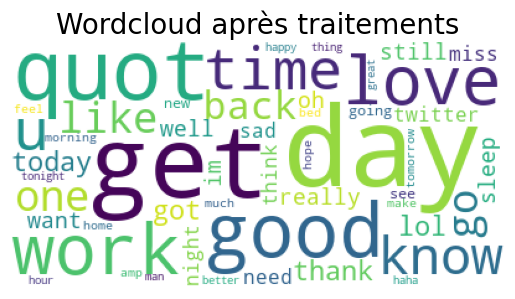

In [9]:
wordcloud_before_traitements(wordcloud_lem, "Wordcloud après traitements")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Après le traitement du langage  naturel, le graphique wordcloud contient une large majorité de mots contenant plus de 3 lettres, ces mots sont plus ciblés pour déterminer un sentiment que des mots qui ne sont pas traités.
</div>

# <center><a id='lemmatisation'>Lémmatisation</a></center>

In [8]:
data["lemmatized_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [9]:
data["lemmatized_tweet"] = data["lemmatized_tweet"].apply(lambda x: tokenize_tweet(x))

In [10]:
data['lemmatized_tweet'] = lemm_corpus(data["lemmatized_tweet"])

In [11]:
data['lemmatized_tweet']

0       katebornstein pretty anti memorial tattoo stri...
1                                          stik chocolate
2       ordered pita nevr came say fax machine broke d...
3       itsangie canceled plane ticket hotel stay tick...
4                             offbytwo seeing doctor hope
                              ...                        
1995    seen preview movie quot obsessed quot w beyonc...
1996    evoip responded stupid cat helping type forgiv...
1997    another bright sunny day island must driftered...
1998                                agghhhh looosing mind
1999                                              woo cub
Name: lemmatized_tweet, Length: 2000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pour lemmatiser  les tweets, une tokénization est nécessaire pour pouvoir lémmatiser chaque mot d'un tweet, les traitements effectués sont :<br>
<ul>
    <li>Tokénization</li>
    <li>Lemmatisation </li>
</ul>
</div>

# <center><a id='stemming'>Stemming</a></center>

In [12]:
data["stemmed_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [13]:
data["stemmed_tweet"] = data["stemmed_tweet"].apply(lambda x: tokenize_tweet(x))

In [14]:
data['stemmed_tweet'] = stem_corpus(data["stemmed_tweet"])

In [15]:
data['stemmed_tweet'] 

0       katebornstein pretti anti memori tattoo strict...
1                                             stik chocol
2       order pita nevr came say fax machin broke driv...
3       itsangi cancel plane ticket hotel stay ticket ...
4                                offbytwo see doctor hope
                              ...                        
1995    seen preview movi quot obsess quot w beyonc wo...
1996      evoip respond stupid cat help type forgiv error
1997    anoth bright sunni day island must drifter sou...
1998                                   agghhhh looos mind
1999                                              woo cub
Name: stemmed_tweet, Length: 2000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pour stemming les tweets, une tokénization est nécessaire pour pouvoir stemming chaque mot d'un tweet, les traitements effectués sont :<br>
<ul>
    <li>Tokénization</li>
    <li>Stemming</li>
</ul>
</div>

# <center><a id='rappel_target'>Rappel nombres de variables cible dans le dataframe</a></center>

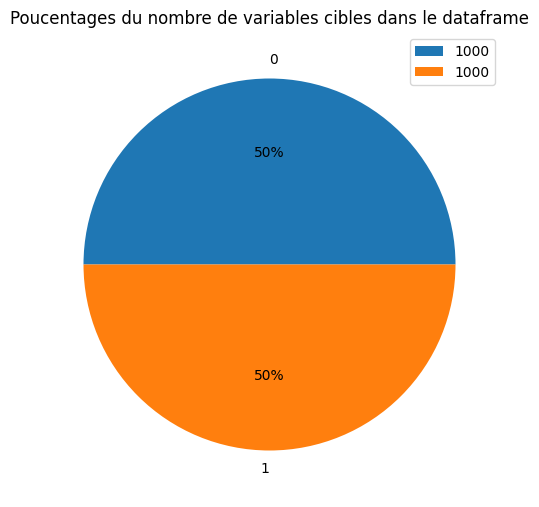

In [19]:
pie_chart_target(data["target"])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Pour rappel, le découpage des sentiments se compose selon le dataframe de 1 000 ou 20 000 tweets positifs et de 1 000 ou 20 000 tweets négatifs.
</div>

# <center><a id='log_count_lem'>Régression Logistique modèle de base (Countvectorizer avec Lémmatisation)</a></center>

In [20]:
vectorizer = CountVectorizer()
X_count_lem = vectorizer.fit_transform(data['lemmatized_tweet'])
y_count_lem = data['target']
count_vect_lem_features = vectorizer.get_feature_names_out()

In [21]:
X_train_count_lem, X_test_count_lem, X_val_count_lem, y_train_count_lem, y_test_count_lem, y_val_count_lem = train_test_val_split(X_count_lem, y_count_lem)

In [22]:
log_count_lem, log_pred_count_lem, time_training_count_stem, tableau_score = all_models_generator("Régression Logistique Count Lemmatized", "REG", 0, 0, 0, tableau_score, X_train_count_lem, X_test_count_lem, X_val_count_lem, y_train_count_lem, y_test_count_lem, y_val_count_lem )

2023/03/09 16:41:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P07\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


              precision    recall  f1-score   support

           0       0.70      0.69      0.69       200
           1       0.69      0.71      0.70       200

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



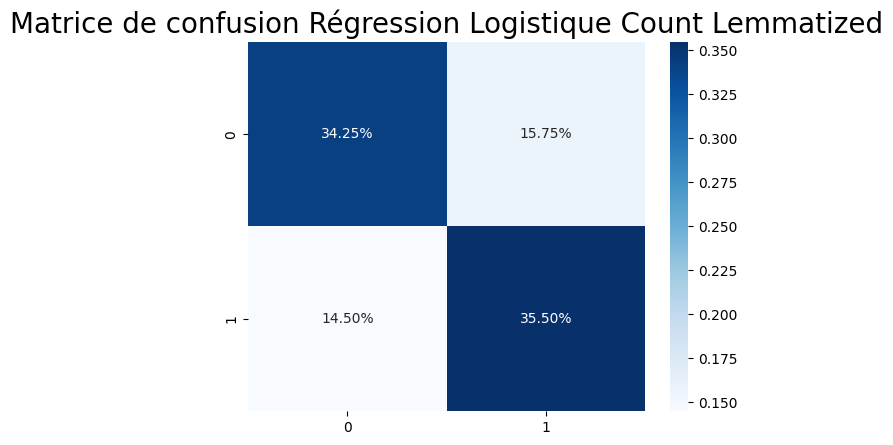

In [23]:
confusion_report_matrix("Matrice de confusion Régression Logistique Count Lemmatized", y_test_count_lem, log_pred_count_lem)

 # <center><a id='log_count_stem'>Régression Logistique modèle de base (Countvectorizer avec Stemming)</a></center>

In [24]:
vectorizer = CountVectorizer()
X_count_stem = vectorizer.fit_transform(data['stemmed_tweet'])
y_count_stem = data['target']
count_vect_stem_features = vectorizer.get_feature_names_out()

In [25]:
X_train_count_stem, X_test_count_stem, X_val_count_stem, y_train_count_stem, y_test_count_stem, y_val_count_stem = train_test_val_split(X_count_stem, y_count_stem)

In [26]:
log_count_stem, log_pred_count_stem, time_training_count_stem, tableau_score = all_models_generator("Régression Logistique Count Stemmed", "REG", 0, 0, 0, tableau_score, X_train_count_stem, X_test_count_stem, X_val_count_stem, y_train_count_stem, y_test_count_stem, y_val_count_stem)

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       200
           1       0.68      0.69      0.69       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



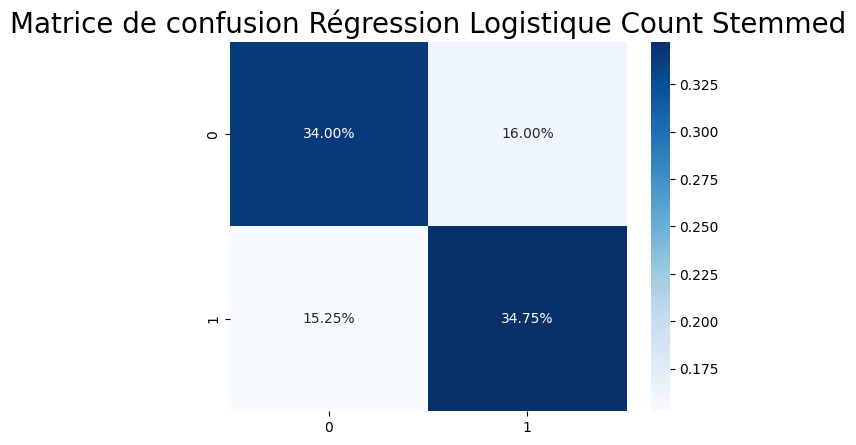

In [27]:
confusion_report_matrix("Matrice de confusion Régression Logistique Count Stemmed", y_test_count_stem, log_pred_count_stem)

# <center><a id='log_tfidf_lem'>Régression Logistique modèle de base (TF-IDF avec Lémmatisation)</a></center>

In [28]:
vectorizer = TfidfVectorizer()
X_tfidf_lem = vectorizer.fit_transform(data['lemmatized_tweet'])
y_tfidf_lem = data['target']
tfidf_lem_features = vectorizer.get_feature_names_out()

In [29]:
X_train_tfidf_lem, X_test_tfidf_lem, X_val_tfidf_lem, y_train_tfidf_lem, y_test_tfidf_lem, y_val_tfidf_lem = train_test_val_split(X_tfidf_lem, y_tfidf_lem)

In [30]:
log_tfidf_lem, log_pred_tfidf_lem, time_training_tfidf_lem, tableau_score = all_models_generator("Régression Logistique TF-IDF Lemmatized",  "REG", 0, 0, 0, tableau_score, X_train_tfidf_lem, X_test_tfidf_lem, X_val_tfidf_lem, y_train_tfidf_lem, y_test_tfidf_lem, y_val_tfidf_lem)

              precision    recall  f1-score   support

           0       0.73      0.67      0.69       200
           1       0.69      0.75      0.72       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



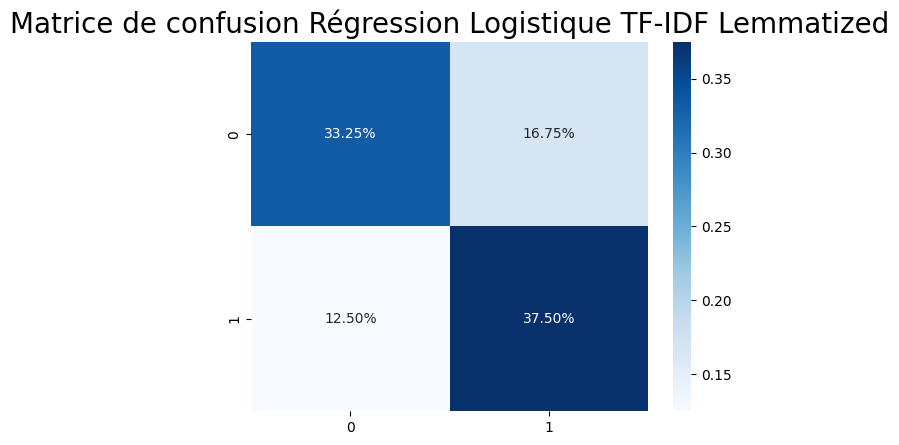

In [31]:
confusion_report_matrix("Matrice de confusion Régression Logistique TF-IDF Lemmatized", y_test_tfidf_lem, log_pred_tfidf_lem)

# <center><a id='log_tfidf_stem'>Régression Logistique modèle de base (TF-IDF avec Stemming)</a></center>

In [32]:
vectorizer = TfidfVectorizer()
X_tfidf_stem = vectorizer.fit_transform(data['stemmed_tweet'])
y_tfidf_stem = data['target']
tfidf_stem_features = vectorizer.get_feature_names_out()

In [33]:
X_train_tfidf_stem, X_test_tfidf_stem, X_val_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem, y_val_tfidf_stem = train_test_val_split(X_tfidf_stem, y_tfidf_stem)

In [34]:
log_tfidf_stem, log_pred_tfidf_stem, time_training_tfidf_stem, tableau_score = all_models_generator("Régression Logistique TF-IDF Stemmed", "REG", 0, 0, 0, tableau_score, X_train_tfidf_stem, X_test_tfidf_stem, X_val_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem, y_val_tfidf_stem)

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       200
           1       0.68      0.72      0.70       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



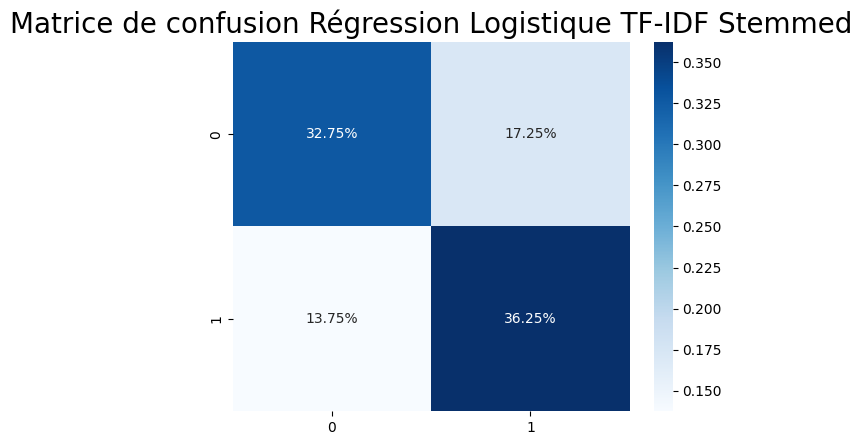

In [35]:
confusion_report_matrix("Matrice de confusion Régression Logistique TF-IDF Stemmed", y_test_tfidf_stem, log_pred_tfidf_stem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Les documents sont convertis en une matrice de données numériques avec la méthode CountVectorizer ou en méthode de pondération avec TF-IDF qui détermine l'importance des mots dans les documents, car l'ordinateur ne comprend pas les caractères et les mots.<br>
Les données lemmatisées ou stemming sont utilisées pour l'entraînement du modèle de Régression Logistique.<br>
Les données sont divisées en 3 ensembles :<br>
<ul>
<li>Données d'entraînement</li>
<li>Données de test</li>
<li>Données de validation</li>
</ul>
Le résultat des données qui ont été extrait avec la méthode TF-IDF, ont un meilleur résultat que celles qui l'ont été avec le Bag-Of-Word CountVectoriser que ces données soit lemmatiser ou stemming.<br>
Dans les matrices de confusions, le score de Vrai Positifs et de Vrai Négatif est largement supérieur aux Faux Positifs et au Faux Négatif.<br>
Le score AUC du modèle ayant les meilleurs résultats est d'environ 0.75 avec 40 000 tweets et environ 71 avec 2 000 tweets.
</div>

# <center><a id='best_model'>Graphique AUC-ROC meilleur modèle</a></center>

Aléatoire: ROC AUC=0.500
Régression LogistiqueROC AUC=0.708


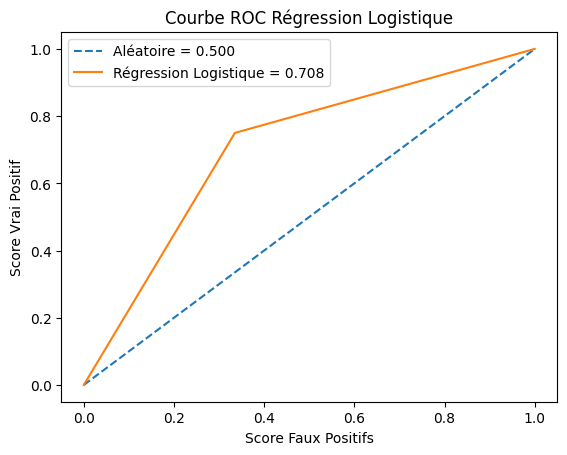

In [36]:
reg_log_graph(log_tfidf_lem,X_test_tfidf_lem, y_test_tfidf_lem, "Régression Logistique")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Dans ce graphique, une courbe et une ligne sont visibles :<br>
<ul>
<li>Une ligne aléatoire (quand le modèle prédit au hasard)</li>
<li>Une courbe Régression Logistique (le score AUC du meilleur modèle de Régression Logistique)</li>
</ul>
Le score AUC du meilleur modèle de Régression Logistique est plutôt bon.
</div>

# <center><a id='shap_best_model'>SHAP du meilleur modèle</a></center>

In [37]:
explainer = shap.Explainer(log_count_lem, X_train_count_lem, feature_names=count_vect_lem_features)
shap_values = explainer(X_test_count_lem)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


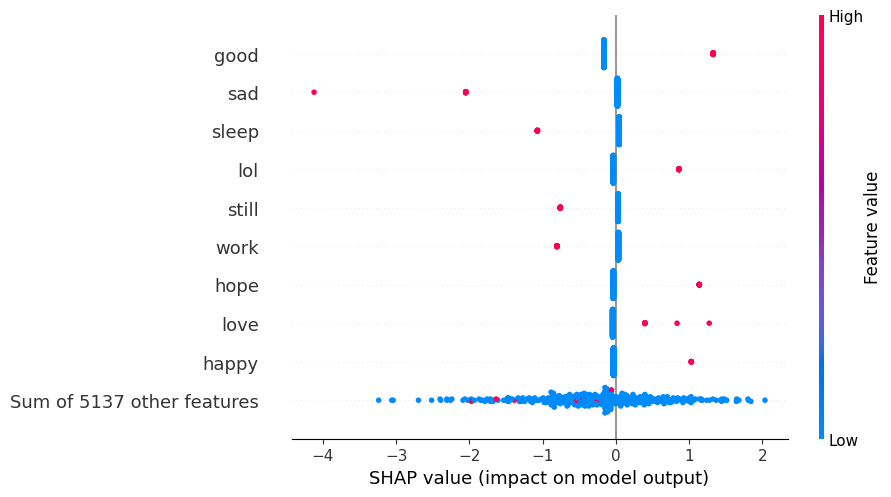

In [38]:
shap.plots.beeswarm(shap_values)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Dans ce graphique Beeswarm, indique si les mots ont une relation fortement ou faiblement Positif ou Négatif.<br>
<ul>
<li>Good a une forte relation positif</li>
<li>Sad a une forte relation Négative</li>
<li>Lol a une forte relation positif</li>
<li>Hope a une forte relation positif</li>
<li>Happy a une forte relation positif</li>
</ul>
</div>

# <center><a id='score_board'>Tableau des scores</a></center>

In [39]:
tableau_score = pd.DataFrame(tableau_score)

In [40]:
tableau_score

,Nom du modèle,Temps d'entraînement,AUC-score_test,AUC-score_val,F1-score_test,F1-score_val,Précision-score_test,Précision-score_val,Rappel-score_test,Rappel-score_val,F-bêta-score_test,F-bêta-score_val,accuracy-score_test,accuracy-score_val
0,Régression Logistique Count Lemmatized,5.009784,0.6975,0.665625,0.701235,0.686217,0.692683,0.646409,0.710,0.73125,0.697529,0.666078,0.6975,0.665625
1,Régression Logistique Count Stemmed,4.029856,0.6875,0.628125,0.689826,0.648968,0.684729,0.614525,0.695,0.68750,0.687509,0.628153,0.6875,0.628125
2,Régression Logistique TF-IDF Lemmatized,4.008873,0.7075,0.675000,0.719424,0.704545,0.691244,0.645833,0.750,0.77500,0.707883,0.676314,0.7075,0.675000
3,Régression Logistique TF-IDF Stemmed,4.126102,0.6900,0.643750,0.700483,0.670520,0.677570,0.623656,0.725,0.72500,0.690204,0.644072,0.6900,0.643750


In [36]:
tableau_score.to_csv("csv/tableau_score.csv", index=False) 

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Ce tableau des scores représentes les résultats des modèles de Régression Logistique lemmatisé ou stemming et vectoriser avec CountVectorizer ou avec TF-IDF.<br>
Il affiche des informations concernant :<br>
<ul>
<li>Le nom de modèle</li>
<li>Le temps d'entraînement</li>
<li>Les valeurs de Test et de validation AUC, Accuracy, F1-score, Précision, Rappel et F-bêta</li>
</ul>
Le meilleur modèle est : Régression Logistique TF-IDF Lemmatized.
</div>

# <center><a id='mlflow'>Affichage de l'interface MLFlow</a></center>

In [37]:
connect_ngrock_local()

MLflow Tracking UI: https://d179-2a01-e0a-47f-bd20-a1eb-99f4-17b1-cb55.ngrok.io


In [38]:
!mlflow ui

t=2023-02-15T20:00:15+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=51068600b8b0 clientid=ab0aca6795249b845454aab0e7eed365
t=2023-02-15T20:00:15+0100 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=fbd1c05abdf3 err="session closed"
t=2023-02-15T20:03:26+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=5f237a2f99d3 clientid=ab0aca6795249b845454aab0e7eed365
t=2023-02-15T20:03:27+0100 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=fbd1c05abdf3 err="read EOF from remote peer"


^C


t=2023-02-16T02:17:42+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=8cf94709b5c1 clientid=ab0aca6795249b845454aab0e7eed365
t=2023-02-16T02:17:42+0100 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=fbd1c05abdf3 err="session closed"
t=2023-02-16T02:17:42+0100 lvl=eror msg="failed to reconnect session" obj=csess id=fbd1c05abdf3 err="dial tcp: lookup tunnel.us.ngrok.com: no such host"
t=2023-02-16T02:17:42+0100 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": dial tcp: lookup update.equinox.io: no such host"
t=2023-02-16T02:17:43+0100 lvl=eror msg="failed to reconnect session" obj=csess id=fbd1c05abdf3 err="dial tcp: lookup tunnel.us.ngrok.com: no such host"
t=2023-02-16T02:17:43+0100 lvl=eror msg="failed to reconnect session" obj=csess id=fbd1c05abdf3 err="Get \"https://dns.google.com/resolve?cd=true&name=tunnel.us.ngrok.com&type=A\": dial tcp: lookup dns.google.com: no such host"


<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Affichage de l'interface MLFLOW, pour pouvoir examiner en profondeur les modèles avec beaucoup plus de détails.
</div>

# <center><a id='conclusion'>Conclusion</a></center>

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Le modèle Régression Logistique TF-IDF Lemmatized obtient les meilleurs résultats, il peut donc être utilisé pour cette tache de classification avec une métrique AUC atteignant environ 0.71 avec un dataset de 2 000 tweets et environ 0.75 avec un jeu de données de 40 000 tweets.
</div>